In [ ]:
!pip install ultralytics torch torchvision opencv-python numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="NwOq8YGFjNY57lbPrwBo")
project = rf.workspace("ahsan-h6w1d").project("iris-segmentation-nfjxo")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to iris-segmentation-2 in yolov8:: 100%|██████████| 2528/2528 [00:00<00:00, 4411.64it/s]


In [ ]:
from ultralytics import YOLO
import torch

# 1. Load the YOLOv8-seg model (using the nano version for efficiency, but you can use 'yolov8m-seg.pt' or 'yolov8l-seg.pt' for better performance)
model = YOLO('yolov8n-seg.pt')  # Pre-trained YOLOv8 segmentation model

# 2. Define the path to your dataset configuration file
data_path = '/content/iris-segmentation-2/data.yaml'  # Replace with the actual path to your data.yaml file

# 3. Train the model
results = model.train(
    data=data_path,  # Path to your dataset configuration file
    epochs=200,      # Number of training epochs (adjust based on your dataset size and needs)
    imgsz=640,       # Image size (adjust based on your eye images or hardware)
    batch=16,        # Batch size (adjust based on GPU memory)
    project='runs/train',  # Directory to save training results
    name='iris_seg',  # Name of the experiment
    device=0,        # Use GPU 0 (set to 'cpu' if no GPU available)
    optimizer='Adam',  # Optimizer (default is SGD, but Adam can work well for segmentation)
    lr0=0.001,       # Initial learning rate
    patience=50,     # Number of epochs to wait for improvement before stopping
    exist_ok=True    # Allow overwriting existing runs
)

# 4. Evaluate the model on the validation set
results = model.val(data=data_path, split='val')

print("Training and evaluation completed!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.74M/6.74M [00:00<00:00, 96.1MB/s]


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/iris-segmentation-2/data.yaml, epochs=200, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs/train, name=iris_seg, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 24.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 112MB/s]


AMP: checks passed ✅


train: Scanning /content/iris-segmentation-2/train/labels... 1113 images, 12 backgrounds, 0 corrupt: 100%|██████████| 1113/1113 [00:01<00:00, 991.17it/s]

train: New cache created: /content/iris-segmentation-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/iris-segmentation-2/valid/labels... 96 images, 0 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<00:00, 395.67it/s]

val: New cache created: /content/iris-segmentation-2/valid/labels.cache


Plotting labels to runs/train/iris_seg/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/iris_seg
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200       2.6G      1.073      1.875      1.449       1.17         14        640: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         96         97     0.0372       0.32     0.0268     0.0159     0.0315       0.68     0.0332     0.0151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.58G      1.003      1.486     0.7769      1.104         20        640: 100%|██████████| 70/70 [00:25<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         96         97      0.949      0.771      0.866      0.655      0.861       0.68      0.735      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.54G          1      1.418     0.7178      1.102         18        640: 100%|██████████| 70/70 [00:23<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         96         97      0.957      0.897      0.953      0.681      0.957      0.897      0.955      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.59G      1.002      1.424     0.7139       1.11         21        640: 100%|██████████| 70/70 [00:23<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         96         97       0.95      0.969      0.982      0.764       0.95      0.969      0.982      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.56G     0.9352      1.373     0.6401      1.072         16        640: 100%|██████████| 70/70 [00:24<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         96         97      0.958       0.93      0.965      0.727      0.958       0.93      0.958      0.732



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.54G      0.976      1.378     0.6517      1.101         10        640: 100%|██████████| 70/70 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         96         97      0.979       0.99      0.982       0.78      0.979       0.99      0.982      0.792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.59G     0.9365      1.345     0.6239       1.07         17        640: 100%|██████████| 70/70 [00:24<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         96         97      0.947      0.959      0.967      0.757      0.947      0.959      0.967      0.757



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.58G     0.9186      1.312     0.6131      1.063         18        640: 100%|██████████| 70/70 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         96         97       0.99      0.979      0.984       0.77       0.99      0.979      0.984      0.799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.56G     0.8988      1.323     0.5956       1.06         16        640: 100%|██████████| 70/70 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         96         97      0.945      0.948      0.977      0.757      0.956      0.918      0.969      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.52G     0.9002       1.32     0.5804      1.047         25        640: 100%|██████████| 70/70 [00:23<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         96         97      0.975      0.969      0.974      0.771      0.979      0.979      0.983      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.55G     0.9003        1.3     0.5629      1.047         14        640: 100%|██████████| 70/70 [00:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         96         97      0.988      0.969      0.985      0.775      0.988      0.969      0.984      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.56G     0.8346       1.23     0.5245      1.029         22        640: 100%|██████████| 70/70 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         96         97      0.994      0.969      0.986      0.793      0.994      0.969      0.986      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.54G     0.8662      1.245       0.54      1.036         21        640: 100%|██████████| 70/70 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         96         97      0.977      0.979       0.99      0.801      0.977      0.979      0.983      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.54G     0.8481      1.247     0.5105      1.028         20        640: 100%|██████████| 70/70 [00:23<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         96         97      0.983      0.969      0.976      0.803      0.983      0.969      0.984      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.57G     0.8213      1.196     0.5067      1.015         12        640: 100%|██████████| 70/70 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         96         97      0.988       0.99      0.986      0.794      0.988       0.99      0.986      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.52G     0.8396      1.222     0.5074       1.03         20        640: 100%|██████████| 70/70 [00:23<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         96         97      0.989       0.99      0.988      0.808      0.989       0.99      0.988        0.8



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.55G     0.8393      1.217     0.5316      1.018         17        640: 100%|██████████| 70/70 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         96         97      0.989       0.99      0.984      0.791      0.989       0.99      0.984      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.57G     0.8442      1.227     0.5136      1.021         17        640: 100%|██████████| 70/70 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         96         97       0.95      0.988      0.985      0.813      0.979      0.979      0.986       0.82



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200       2.6G     0.8139      1.216     0.5156       1.02          9        640: 100%|██████████| 70/70 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         96         97      0.981      0.969      0.983      0.801       0.97      0.985      0.983      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.58G     0.8131        1.2     0.5072      1.024         20        640: 100%|██████████| 70/70 [00:23<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         96         97      0.978       0.99      0.979      0.809      0.978       0.99      0.979      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.54G     0.8335      1.219     0.5067      1.025         21        640: 100%|██████████| 70/70 [00:23<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         96         97      0.958      0.969      0.963      0.755      0.958      0.969       0.97      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.56G     0.7836      1.168       0.48      1.002         25        640: 100%|██████████| 70/70 [00:24<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         96         97       0.99      0.988      0.987      0.797       0.99      0.988      0.987      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.58G      0.815       1.19     0.4839      1.009         13        640: 100%|██████████| 70/70 [00:23<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         96         97       0.97      0.989      0.984      0.776       0.97      0.989      0.984      0.794



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.54G     0.8384      1.266     0.4941      1.027         23        640: 100%|██████████| 70/70 [00:22<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         96         97       0.98      0.989      0.991      0.821       0.98      0.989      0.988      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.62G     0.7823      1.133     0.4633     0.9955         12        640: 100%|██████████| 70/70 [00:23<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         96         97      0.993      0.979       0.99      0.822      0.989       0.99       0.99      0.823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.54G     0.8016      1.165       0.47     0.9971         16        640: 100%|██████████| 70/70 [00:22<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         96         97          1      0.969      0.986      0.795          1      0.969      0.986      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.52G     0.7635      1.175     0.4644     0.9904         18        640: 100%|██████████| 70/70 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         96         97       0.98      0.988      0.988      0.807       0.98      0.988      0.988      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.57G     0.7731      1.157     0.4576     0.9966         17        640: 100%|██████████| 70/70 [00:22<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         96         97      0.997      0.969      0.989      0.817      0.997      0.969      0.989      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.62G       0.74      1.117     0.4479     0.9874         14        640: 100%|██████████| 70/70 [00:22<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         96         97      0.941      0.987      0.985      0.789      0.941      0.987      0.985      0.783



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.54G     0.7606      1.162     0.4564     0.9922         17        640: 100%|██████████| 70/70 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         96         97      0.997      0.969      0.979      0.812      0.999       0.99      0.988      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.58G     0.7569      1.161     0.4514     0.9907         15        640: 100%|██████████| 70/70 [00:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         96         97      0.978      0.979      0.988      0.814      0.978      0.979      0.988      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.56G     0.7562      1.125     0.4651     0.9809         14        640: 100%|██████████| 70/70 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         96         97       0.97      0.988      0.988      0.825       0.97      0.988      0.988      0.823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.52G     0.7329      1.129     0.4486     0.9776         21        640: 100%|██████████| 70/70 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         96         97      0.979      0.977       0.98      0.809      0.979      0.977      0.972      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.54G     0.7486      1.167     0.4573     0.9801         18        640: 100%|██████████| 70/70 [00:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         96         97       0.99      0.977       0.97      0.783       0.99      0.977       0.97      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.56G     0.7697      1.152     0.4724     0.9877         19        640: 100%|██████████| 70/70 [00:23<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         96         97      0.978       0.99      0.994      0.802      0.978       0.99      0.986      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.52G     0.7439      1.107     0.4346     0.9763         15        640: 100%|██████████| 70/70 [00:23<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all         96         97      0.989       0.99      0.987      0.798      0.989       0.99      0.987      0.799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.52G     0.7147      1.082     0.4157     0.9726         17        640: 100%|██████████| 70/70 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         96         97      0.989       0.99      0.986      0.795      0.989       0.99      0.986      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.58G      0.717      1.076     0.4231     0.9754         14        640: 100%|██████████| 70/70 [00:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         96         97      0.978       0.99      0.988      0.818      0.978       0.99      0.988      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.52G     0.7315      1.103     0.4277     0.9702         19        640: 100%|██████████| 70/70 [00:23<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         96         97       0.99      0.989      0.988      0.809       0.99      0.989      0.988      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.62G     0.7244      1.095     0.4328     0.9675         18        640: 100%|██████████| 70/70 [00:23<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         96         97      0.989      0.979      0.987      0.794      0.989      0.979      0.987      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.59G     0.7129      1.098     0.4366     0.9629         19        640: 100%|██████████| 70/70 [00:23<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all         96         97      0.986      0.969      0.975      0.788      0.986      0.969      0.975      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.55G     0.7219      1.082     0.4278     0.9775         16        640: 100%|██████████| 70/70 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         96         97      0.987      0.979      0.977      0.769      0.987      0.979      0.977       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.52G     0.7342      1.135     0.4412     0.9855         16        640: 100%|██████████| 70/70 [00:24<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         96         97       0.99      0.979      0.976       0.79       0.99      0.979      0.976      0.807



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200       2.5G     0.7292      1.077     0.4415     0.9728         17        640: 100%|██████████| 70/70 [00:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         96         97      0.997      0.959       0.97      0.784      0.997      0.959       0.97      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.52G     0.6925      1.054     0.4093     0.9604         16        640: 100%|██████████| 70/70 [00:23<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         96         97      0.989      0.979      0.986      0.783      0.989      0.979      0.986      0.792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.54G      0.682       1.05     0.4156     0.9548         30        640: 100%|██████████| 70/70 [00:23<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         96         97      0.979      0.978      0.985      0.783      0.979      0.978      0.985      0.798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.54G     0.7059      1.048     0.4224     0.9621         21        640: 100%|██████████| 70/70 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         96         97      0.989      0.979      0.985      0.782      0.989      0.979      0.985      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.52G     0.6987      1.073     0.4156     0.9588         12        640: 100%|██████████| 70/70 [00:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all         96         97       0.99      0.988      0.985      0.767       0.99      0.988      0.985      0.782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200       2.6G     0.7003      1.081     0.4222     0.9622         14        640: 100%|██████████| 70/70 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         96         97      0.989      0.969      0.974      0.776      0.989      0.969      0.974      0.769



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.56G     0.6816       1.04      0.414      0.953         21        640: 100%|██████████| 70/70 [00:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         96         97      0.989      0.979      0.975      0.775      0.989      0.979      0.975      0.786



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.54G     0.6699      1.066     0.3972     0.9512         21        640: 100%|██████████| 70/70 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         96         97      0.999      0.969      0.989      0.803      0.999      0.969      0.989      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.54G     0.6641      1.044     0.4099     0.9572         17        640: 100%|██████████| 70/70 [00:24<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         96         97      0.989      0.969      0.978      0.788      0.989      0.969      0.978      0.798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.52G     0.6794      1.054     0.4071     0.9601         17        640: 100%|██████████| 70/70 [00:23<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         96         97      0.999      0.969      0.976       0.78      0.999      0.969      0.976      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.52G     0.6715      1.049     0.4034     0.9559         21        640: 100%|██████████| 70/70 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         96         97      0.989      0.969      0.979      0.795      0.989      0.969      0.979      0.799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200       2.6G     0.6438       1.02     0.3877     0.9377         23        640: 100%|██████████| 70/70 [00:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         96         97      0.989      0.979      0.975       0.78      0.989      0.979      0.975      0.794



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.57G     0.6347      1.016     0.3847     0.9365         16        640: 100%|██████████| 70/70 [00:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all         96         97          1      0.971      0.985      0.791          1      0.971      0.985      0.807



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.55G     0.6396     0.9978     0.3912     0.9423         13        640: 100%|██████████| 70/70 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         96         97      0.977       0.99      0.986      0.787      0.977       0.99      0.986      0.805



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.55G     0.6509     0.9957     0.3974     0.9518         16        640: 100%|██████████| 70/70 [00:22<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         96         97          1      0.968      0.979      0.785          1      0.968      0.979      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.55G     0.6188     0.9909     0.3746     0.9334         20        640: 100%|██████████| 70/70 [00:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         96         97      0.989      0.979      0.985      0.801      0.989      0.979      0.985      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.54G     0.6639      1.021     0.4021     0.9539         13        640: 100%|██████████| 70/70 [00:22<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         96         97      0.989       0.96      0.976      0.757      0.989       0.96      0.976      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.57G     0.6536      1.014     0.4021     0.9419         12        640: 100%|██████████| 70/70 [00:24<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]

                   all         96         97       0.99      0.977      0.985      0.813       0.99      0.977      0.985      0.811



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.59G     0.6362      1.005     0.3909     0.9406         11        640: 100%|██████████| 70/70 [00:22<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         96         97      0.988      0.979      0.978       0.79      0.988      0.979      0.978      0.805



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.54G     0.6372     0.9803     0.3867     0.9311         18        640: 100%|██████████| 70/70 [00:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         96         97          1      0.978      0.977      0.783          1      0.978      0.977      0.794



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.54G      0.629     0.9517     0.3769     0.9355         19        640: 100%|██████████| 70/70 [00:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         96         97      0.977      0.979       0.98      0.788      0.977      0.979       0.98      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.54G     0.6341      1.004     0.3886     0.9394         20        640: 100%|██████████| 70/70 [00:22<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         96         97      0.999      0.979      0.977      0.794      0.999      0.979      0.977       0.79



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.54G     0.6356     0.9922     0.3924     0.9345         15        640: 100%|██████████| 70/70 [00:24<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         96         97      0.999      0.979      0.986      0.802      0.999      0.979      0.986       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.59G     0.6045     0.9604     0.3755     0.9279         17        640: 100%|██████████| 70/70 [00:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         96         97      0.978      0.959      0.976      0.783      0.978      0.959      0.979      0.778



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.56G     0.6212     0.9751     0.3771     0.9287         18        640: 100%|██████████| 70/70 [00:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         96         97      0.989       0.99      0.986      0.789      0.989       0.99      0.986      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.57G     0.6006       0.96     0.3615     0.9267         16        640: 100%|██████████| 70/70 [00:23<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         96         97       0.99      0.979      0.984      0.798       0.99      0.979      0.984       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.54G     0.6046     0.9602     0.3732     0.9307         18        640: 100%|██████████| 70/70 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         96         97      0.979      0.979      0.982      0.798      0.979      0.979      0.982      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.57G     0.6248     0.9643     0.3738     0.9344         10        640: 100%|██████████| 70/70 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         96         97      0.959      0.969      0.979      0.788      0.979      0.975       0.98      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.57G     0.5962     0.9635     0.3575     0.9249         13        640: 100%|██████████| 70/70 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         96         97      0.979      0.979      0.976      0.782      0.979      0.979      0.976      0.788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.56G     0.6034     0.9582     0.3744     0.9271         20        640: 100%|██████████| 70/70 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         96         97      0.979       0.99      0.987      0.823      0.979       0.99      0.987      0.824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.54G     0.5927     0.9677     0.3679     0.9295         23        640: 100%|██████████| 70/70 [00:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         96         97      0.989      0.969      0.971      0.764       0.99      0.978      0.977      0.769



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.61G     0.5912     0.9435     0.3644     0.9212         15        640: 100%|██████████| 70/70 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         96         97      0.996      0.969      0.969      0.785      0.996      0.969      0.969      0.789



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.55G     0.5876     0.9377      0.372     0.9166         15        640: 100%|██████████| 70/70 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         96         97      0.979      0.979      0.977      0.797      0.979      0.979      0.977      0.799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.59G     0.5902      0.955     0.3623     0.9227         17        640: 100%|██████████| 70/70 [00:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         96         97      0.989      0.968      0.977       0.78      0.989      0.968      0.977      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.54G     0.5696     0.9259     0.3476     0.9198         16        640: 100%|██████████| 70/70 [00:23<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         96         97      0.988      0.969      0.978      0.797      0.988      0.969      0.978      0.799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.52G     0.5634      0.923     0.3476      0.913         13        640: 100%|██████████| 70/70 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         96         97      0.969      0.979      0.981      0.806      0.969      0.979      0.981      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.61G     0.5822     0.9506     0.3549     0.9214         17        640: 100%|██████████| 70/70 [00:23<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         96         97      0.979      0.979      0.978      0.795      0.979      0.979      0.978      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.54G     0.5686     0.9259     0.3485     0.9099         23        640: 100%|██████████| 70/70 [00:24<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         96         97      0.979      0.978      0.979      0.797      0.979      0.978      0.979      0.794



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.54G     0.5704     0.9063     0.3481     0.9081         13        640: 100%|██████████| 70/70 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         96         97      0.999      0.969      0.969      0.795      0.999      0.969      0.969      0.803
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 32, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



82 epochs completed in 0.583 hours.
Optimizer stripped from runs/train/iris_seg/weights/last.pt, 6.8MB
Optimizer stripped from runs/train/iris_seg/weights/best.pt, 6.8MB

Validating runs/train/iris_seg/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]


                   all         96         97       0.97      0.987      0.988      0.824       0.97      0.987      0.988      0.823
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/train/iris_seg
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/iris-segmentation-2/valid/labels.cache... 96 images, 0 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.50it/s]


                   all         96         97       0.97      0.988      0.988      0.824       0.97      0.988      0.988       0.82
Speed: 9.2ms preprocess, 7.4ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/train/iris_seg
Training and evaluation completed!


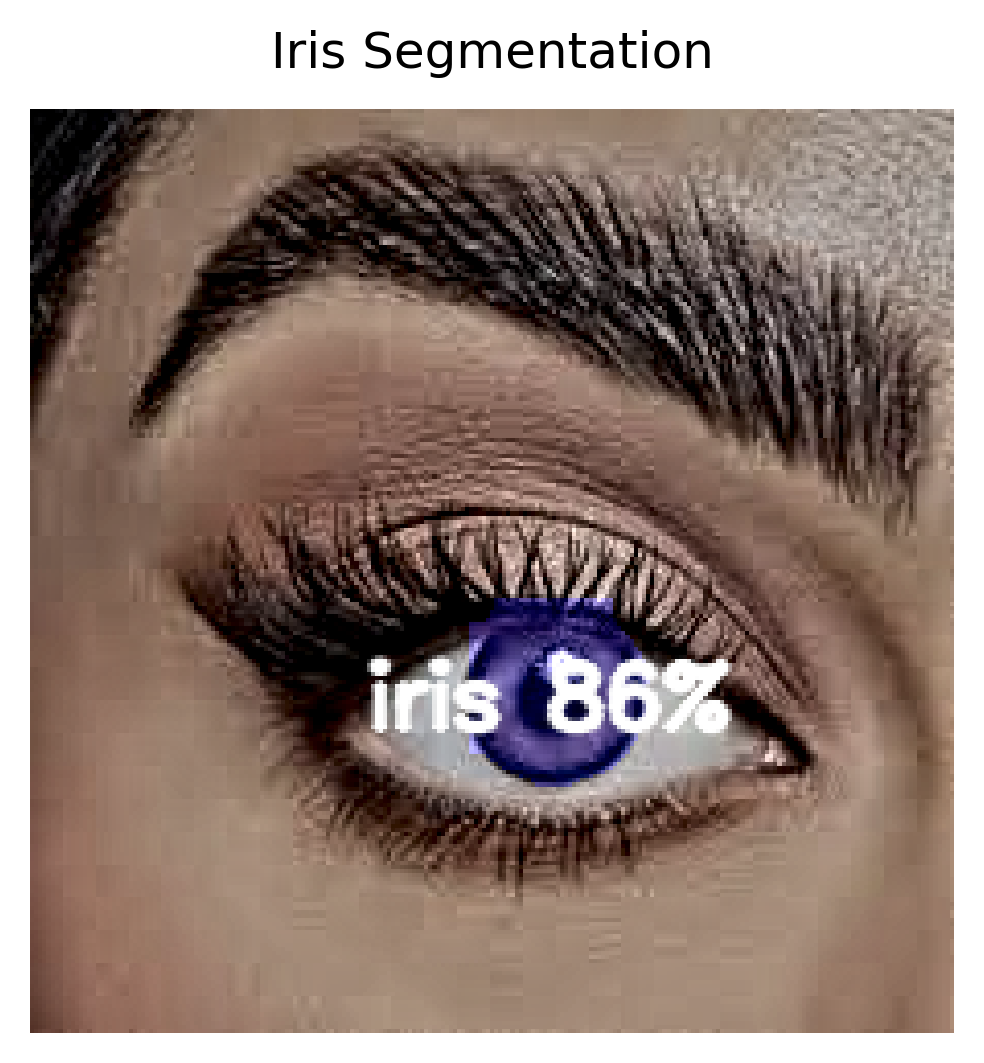

Prediction and visualization completed!


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch  # Import torch to handle GPU tensors

# 1. Load the trained YOLOv8-seg model
model = YOLO('/content/runs/train/iris_seg/weights/best.pt')  # Replace with the path to your trained model

# 2. Define the path to the input eye image
image_path = '/content/download (12).jpg'  # Replace with the path to your input eye image

# 3. Load the original image to get its dimensions and preserve full quality
orig_img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Load with full quality, preserving all channels
orig_h, orig_w = orig_img.shape[:2]

# Ensure the image is in high quality (e.g., 8-bit or 16-bit if applicable)
if orig_img.dtype == np.uint16:  # Handle 16-bit images if present
    orig_img = (orig_img / 256).astype(np.uint8)  # Convert to 8-bit for compatibility with cv2

# 4. Make predictions on the input image, preserving original dimensions where possible
# Use the original image size for prediction, rounded to the nearest multiple of 32 for YOLOv8
target_size = (max(orig_h, orig_w) // 32 * 32, max(orig_h, orig_w) // 32 * 32)  # Ensure divisible by 32
results = model.predict(
    source=image_path,
    conf=0.5,  # Confidence threshold (e.g., 50% or higher)
    save=False,  # Don’t save the output image automatically; we’ll handle visualization
    verbose=False,
    imgsz=target_size  # Use the closest size to original, divisible by 32
)

# 5. Process the results
for result in results:
    # Get the original image and segmentation data
    img = result.orig_img  # Original image (BGR format, possibly padded/resized)
    masks = result.masks.data  # Segmentation masks (PyTorch tensor, possibly on GPU)
    boxes = result.boxes  # Bounding boxes
    classes = result.boxes.cls  # Class IDs (0 for iris, based on your data.yaml)
    confidences = result.boxes.conf  # Confidence scores

    # Move masks to CPU and convert to NumPy
    if torch.cuda.is_available():
        masks = masks.cpu()  # Move to CPU if on GPU
    masks = masks.numpy()  # Convert to NumPy array

    # Resize masks to match the original image dimensions, preserving quality with high-resolution interpolation
    resized_masks = np.zeros((masks.shape[0], orig_h, orig_w), dtype=bool)
    for i, mask in enumerate(masks):
        # Resize each mask to the original image dimensions using high-quality interpolation
        resized_mask = cv2.resize(mask.astype(np.uint8), (orig_w, orig_h), interpolation=cv2.INTER_AREA)  # Use INTER_AREA for better quality
        resized_masks[i] = resized_mask > 0  # Threshold to create a binary mask

    # Create a blank mask overlay for visualization with original image dimensions
    mask_overlay = np.zeros((orig_h, orig_w, 3), dtype=np.uint8)

    # Define color for iris (e.g., blue) in BGR format
    colors = [(255, 0, 0)]  # BGR: Blue for iris (you can change this to any color, e.g., green or red)

    # Draw segmentation masks with custom colors, ensuring sharp edges
    for mask, cls, conf in zip(resized_masks, classes, confidences):
        color = colors[int(cls)]  # Select color based on class (0 = iris)
        # Use a slight sharpening effect on the mask to enhance clarity
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])  # Sharpening kernel
        sharp_mask = cv2.filter2D(mask.astype(np.uint8), -1, kernel) > 0  # Apply sharpening
        mask_overlay[sharp_mask] = color  # Apply mask with the corresponding color, using sharpened edges

    # Blend the original image with the mask (e.g., 30% opacity for the mask to maintain clarity of the original)
    alpha = 0.3  # Reduced transparency to prioritize original image clarity
    blended = cv2.addWeighted(orig_img, 1 - alpha, mask_overlay, alpha, 0.0)

    # Enhance the blended image for sharpness and clarity
    blended = cv2.detailEnhance(blended, sigma_s=10, sigma_r=0.15)  # Enhance details and sharpness

    # Add confidence labels to the image with higher font quality
    for box, cls, conf in zip(boxes.xyxy, classes, confidences):
        x1, y1, x2, y2 = box.int().tolist()  # Convert to integers for drawing
        label = f"{model.names[int(cls)]} {conf:.0%}"  # Format label (e.g., "iris 85%")

        # Draw label with anti-aliased text for better quality
        (text_w, text_h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)  # Slightly larger font for clarity
        text_x = int((x1 + x2 - text_w) / 2)
        text_y = int((y1 + y2 + text_h) / 2)

        cv2.putText(blended, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)

    # 6. Display the result using Matplotlib with small size, high DPI, and RGB format
    plt.figure(figsize=(4, 4), dpi=300)  # Smaller figure size (4x4 inches) with high DPI for sharpness
    plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.axis('off')
    plt.title('Iris Segmentation', pad=10, fontsize=12)  # Smaller title for smaller image
    plt.show()

    # Optional: Save the result with maximum quality (using PNG with no compression)
    cv2.imwrite('predicted_iris.png', blended, [cv2.IMWRITE_PNG_COMPRESSION, 0])  # Save as PNG with no compression

print("Prediction and visualization completed!")


image 1/1 /content/download (27).jpg: 160x288 2 iriss, 71.2ms
Speed: 0.9ms preprocess, 71.2ms inference, 3.1ms postprocess per image at shape (1, 3, 160, 288)


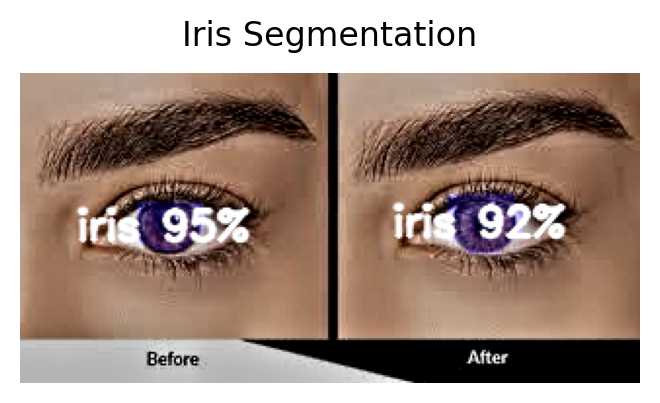

Prediction and visualization completed!


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

# 1. Load the trained YOLOv8-seg model
model = YOLO('/content/runs/train/iris_seg/weights/best.pt')

# 2. Define the path to the input eye image
image_path = '/content/download (27).jpg'

# 3. Load the original image
orig_img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
orig_h, orig_w = orig_img.shape[:2]

if orig_img.dtype == np.uint16:
    orig_img = (orig_img / 256).astype(np.uint8)

# 4. Make predictions
target_size = (max(orig_h, orig_w) // 32 * 32, max(orig_h, orig_w) // 32 * 32)
results = model.predict(
    source=image_path,
    conf=0.25,  # Lowered threshold
    save=False,
    verbose=True,  # Print detection info
    imgsz=target_size
)

# 5. Process the results
for result in results:
    img = result.orig_img
    boxes = result.boxes
    classes = result.boxes.cls
    confidences = result.boxes.conf

    # Handle case where no masks are detected
    if result.masks is not None:
        masks = result.masks.data
        if torch.cuda.is_available():
            masks = masks.cpu()
        masks = masks.numpy()

        resized_masks = np.zeros((masks.shape[0], orig_h, orig_w), dtype=bool)
        for i, mask in enumerate(masks):
            resized_mask = cv2.resize(mask.astype(np.uint8), (orig_w, orig_h), interpolation=cv2.INTER_AREA)
            resized_masks[i] = resized_mask > 0
    else:
        print("No segmentation masks detected.")
        resized_masks = None

    # Create mask overlay
    mask_overlay = np.zeros((orig_h, orig_w, 3), dtype=np.uint8)
    colors = [(255, 0, 0)]  # Blue for iris

    if resized_masks is not None:
        for mask, cls, conf in zip(resized_masks, classes, confidences):
            color = colors[int(cls)]
            kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
            sharp_mask = cv2.filter2D(mask.astype(np.uint8), -1, kernel) > 0
            mask_overlay[sharp_mask] = color

    # Blend images
    alpha = 0.3
    blended = cv2.addWeighted(orig_img, 1 - alpha, mask_overlay, alpha, 0.0)
    blended = cv2.detailEnhance(blended, sigma_s=10, sigma_r=0.15)

    # Add labels
    for box, cls, conf in zip(boxes.xyxy, classes, confidences):
        x1, y1, x2, y2 = box.int().tolist()
        label = f"{model.names[int(cls)]} {conf:.0%}"
        (text_w, text_h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
        text_x = int((x1 + x2 - text_w) / 2)
        text_y = int((y1 + y2 + text_h) / 2)
        cv2.putText(blended, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)

    # 6. Display
    plt.figure(figsize=(4, 4), dpi=200)
    plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Iris Segmentation', pad=10, fontsize=12)
    plt.show()

    # Save
    cv2.imwrite('predicted_iris.png', blended, [cv2.IMWRITE_PNG_COMPRESSION, 0])

print("Prediction and visualization completed!")


image 1/1 /content/10066-raw_jpeg.rf.6611efee5b8435e6c9e61eb4360cb6da.jpg: 640x640 1 iris, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


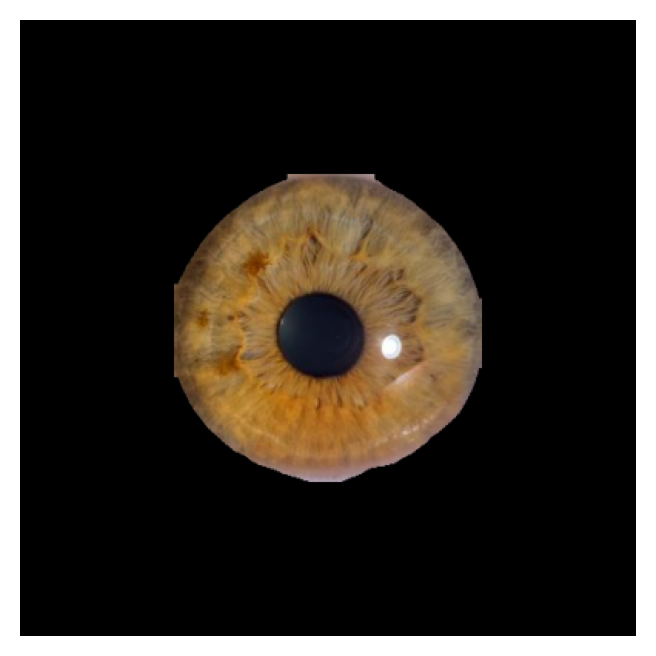

Prediction and visualization completed!


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

# 1. Load the trained YOLOv8-seg model
model = YOLO('/content/best.pt')

# 2. Define the path to the input eye image
image_path = '/content/10066-raw_jpeg.rf.6611efee5b8435e6c9e61eb4360cb6da.jpg'

# 3. Load the original image
orig_img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
orig_h, orig_w = orig_img.shape[:2]

if orig_img.dtype == np.uint16:
    orig_img = (orig_img / 256).astype(np.uint8)

# 4. Make predictions
target_size = (max(orig_h, orig_w) // 32 * 32, max(orig_h, orig_w) // 32 * 32)
results = model.predict(
    source=image_path,
    conf=0.25,  # Lowered threshold
    save=False,
    verbose=True,
    imgsz=target_size
)

# 5. Process the results
for result in results:
    img = result.orig_img
    boxes = result.boxes
    classes = result.boxes.cls
    confidences = result.boxes.conf

    # Handle case where no masks are detected
    if result.masks is not None:
        masks = result.masks.data
        if torch.cuda.is_available():
            masks = masks.cpu()
        masks = masks.numpy()

        # Resize masks to match the original image dimensions
        resized_masks = np.zeros((masks.shape[0], orig_h, orig_w), dtype=bool)
        for i, mask in enumerate(masks):
            resized_mask = cv2.resize(mask.astype(np.uint8), (orig_w, orig_h), interpolation=cv2.INTER_AREA)
            resized_masks[i] = resized_mask > 0

        # Use the first mask (assuming one iris per image)
        iris_mask = resized_masks[0]  # Binary mask of the iris

        # Extract the iris region from the original image using the mask
        iris_region = orig_img.copy()
        iris_region[~iris_mask] = 0  # Set non-iris regions to black

        # Create a black rectangular background (e.g., 400x400 pixels)
        background_size = (400, 400, 3)  # Height, Width, Channels (BGR)
        black_background = np.zeros(background_size, dtype=np.uint8)

        # Get the bounding box of the iris mask to crop it
        y, x = np.where(iris_mask)
        if len(y) > 0 and len(x) > 0:  # Ensure there are valid points
            y_min, y_max = np.min(y), np.max(y)
            x_min, x_max = np.min(x), np.max(x)

            # Crop the iris region
            cropped_iris = iris_region[y_min:y_max, x_min:x_max]

            # Resize the cropped iris to fit the black background (e.g., 200x200 in the center)
            target_iris_size = (200, 200)  # Desired size for the iris in the background
            resized_iris = cv2.resize(cropped_iris, target_iris_size, interpolation=cv2.INTER_AREA)

            # Calculate the center position to place the iris in the black background
            h, w = black_background.shape[:2]
            iris_h, iris_w = resized_iris.shape[:2]
            y_center = (h - iris_h) // 2
            x_center = (w - iris_w) // 2

            # Place the resized iris in the center of the black background
            black_background[y_center:y_center + iris_h, x_center:x_center + iris_w] = resized_iris

        # 6. Display the result
        plt.figure(figsize=(4, 4), dpi=200)
        plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # Optional: Save the result
        cv2.imwrite('extracted_iris_on_black.png', black_background, [cv2.IMWRITE_PNG_COMPRESSION, 0])

    else:
        print("No segmentation masks detected.")

print("Prediction and visualization completed!")


image 1/1 /content/iris-segmentation-1/test/images/Screenshot-2021-11-04-115804_png_jpg.rf.92fdecb9472eaa7c14cf8ae0578c002d.jpg: 640x640 1 iris, 14.0ms
Speed: 2.9ms preprocess, 14.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


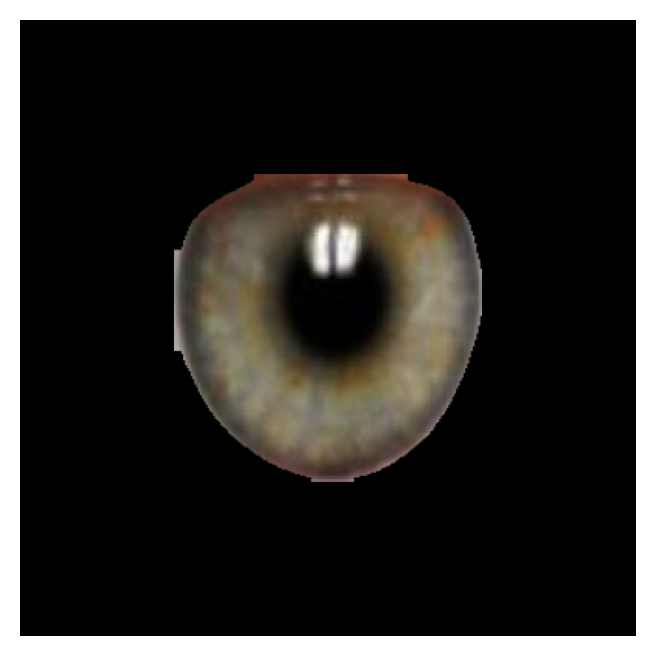

Image saved to: output_iris/extracted_iris_on_black_20250307_173855.png
Prediction and visualization completed!


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from datetime import datetime

# 1. Load the trained YOLOv8-seg model
model = YOLO('/content/runs/train/iris_seg/weights/best.pt')

# 2. Define the path to the input eye image
image_path = '/content/iris-segmentation-1/test/images/Screenshot-2021-11-04-115804_png_jpg.rf.92fdecb9472eaa7c14cf8ae0578c002d.jpg'

# 3. Load the original image
orig_img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
orig_h, orig_w = orig_img.shape[:2]

if orig_img.dtype == np.uint16:
    orig_img = (orig_img / 256).astype(np.uint8)

# 4. Make predictions
target_size = (max(orig_h, orig_w) // 32 * 32, max(orig_h, orig_w) // 32 * 32)
results = model.predict(
    source=image_path,
    conf=0.25,  # Lowered threshold
    save=False,
    verbose=True,
    imgsz=target_size
)

# 5. Create an output folder if it doesn’t exist
output_folder = 'output_iris'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 6. Process the results
for result in results:
    img = result.orig_img
    boxes = result.boxes
    classes = result.boxes.cls
    confidences = result.boxes.conf

    # Handle case where no masks are detected
    if result.masks is not None:
        masks = result.masks.data
        if torch.cuda.is_available():
            masks = masks.cpu()
        masks = masks.numpy()

        # Resize masks to match the original image dimensions
        resized_masks = np.zeros((masks.shape[0], orig_h, orig_w), dtype=bool)
        for i, mask in enumerate(masks):
            resized_mask = cv2.resize(mask.astype(np.uint8), (orig_w, orig_h), interpolation=cv2.INTER_AREA)
            resized_masks[i] = resized_mask > 0

        # Use the first mask (assuming one iris per image)
        iris_mask = resized_masks[0]  # Binary mask of the iris

        # Extract the iris region from the original image using the mask
        iris_region = orig_img.copy()
        iris_region[~iris_mask] = 0  # Set non-iris regions to black

        # Create a black rectangular background (e.g., 400x400 pixels)
        background_size = (400, 400, 3)  # Height, Width, Channels (BGR)
        black_background = np.zeros(background_size, dtype=np.uint8)

        # Get the bounding box of the iris mask to crop it
        y, x = np.where(iris_mask)
        if len(y) > 0 and len(x) > 0:  # Ensure there are valid points
            y_min, y_max = np.min(y), np.max(y)
            x_min, x_max = np.min(x), np.max(x)

            # Crop the iris region
            cropped_iris = iris_region[y_min:y_max, x_min:x_max]

            # Resize the cropped iris to fit the black background (e.g., 200x200 in the center)
            target_iris_size = (200, 200)  # Desired size for the iris in the background
            resized_iris = cv2.resize(cropped_iris, target_iris_size, interpolation=cv2.INTER_AREA)

            # Calculate the center position to place the iris in the black background
            h, w = black_background.shape[:2]
            iris_h, iris_w = resized_iris.shape[:2]
            y_center = (h - iris_h) // 2
            x_center = (w - iris_w) // 2

            # Place the resized iris in the center of the black background
            black_background[y_center:y_center + iris_h, x_center:x_center + iris_w] = resized_iris

        # 7. Display the result
        plt.figure(figsize=(4, 4), dpi=200)
        plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # 8. Save the result in the output folder with a timestamp
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        output_filename = f'extracted_iris_on_black_{timestamp}.png'
        output_path = os.path.join(output_folder, output_filename)
        cv2.imwrite(output_path, black_background, [cv2.IMWRITE_PNG_COMPRESSION, 0])
        print(f"Image saved to: {output_path}")

    else:
        print("No segmentation masks detected.")

print("Prediction and visualization completed!")


image 1/1 /content/iris-segmentation-2/test/images/10241-raw_jpeg_jpg.rf.6f67df8015d6601f6e2569eafea529ae.jpg: 640x640 1 iris, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


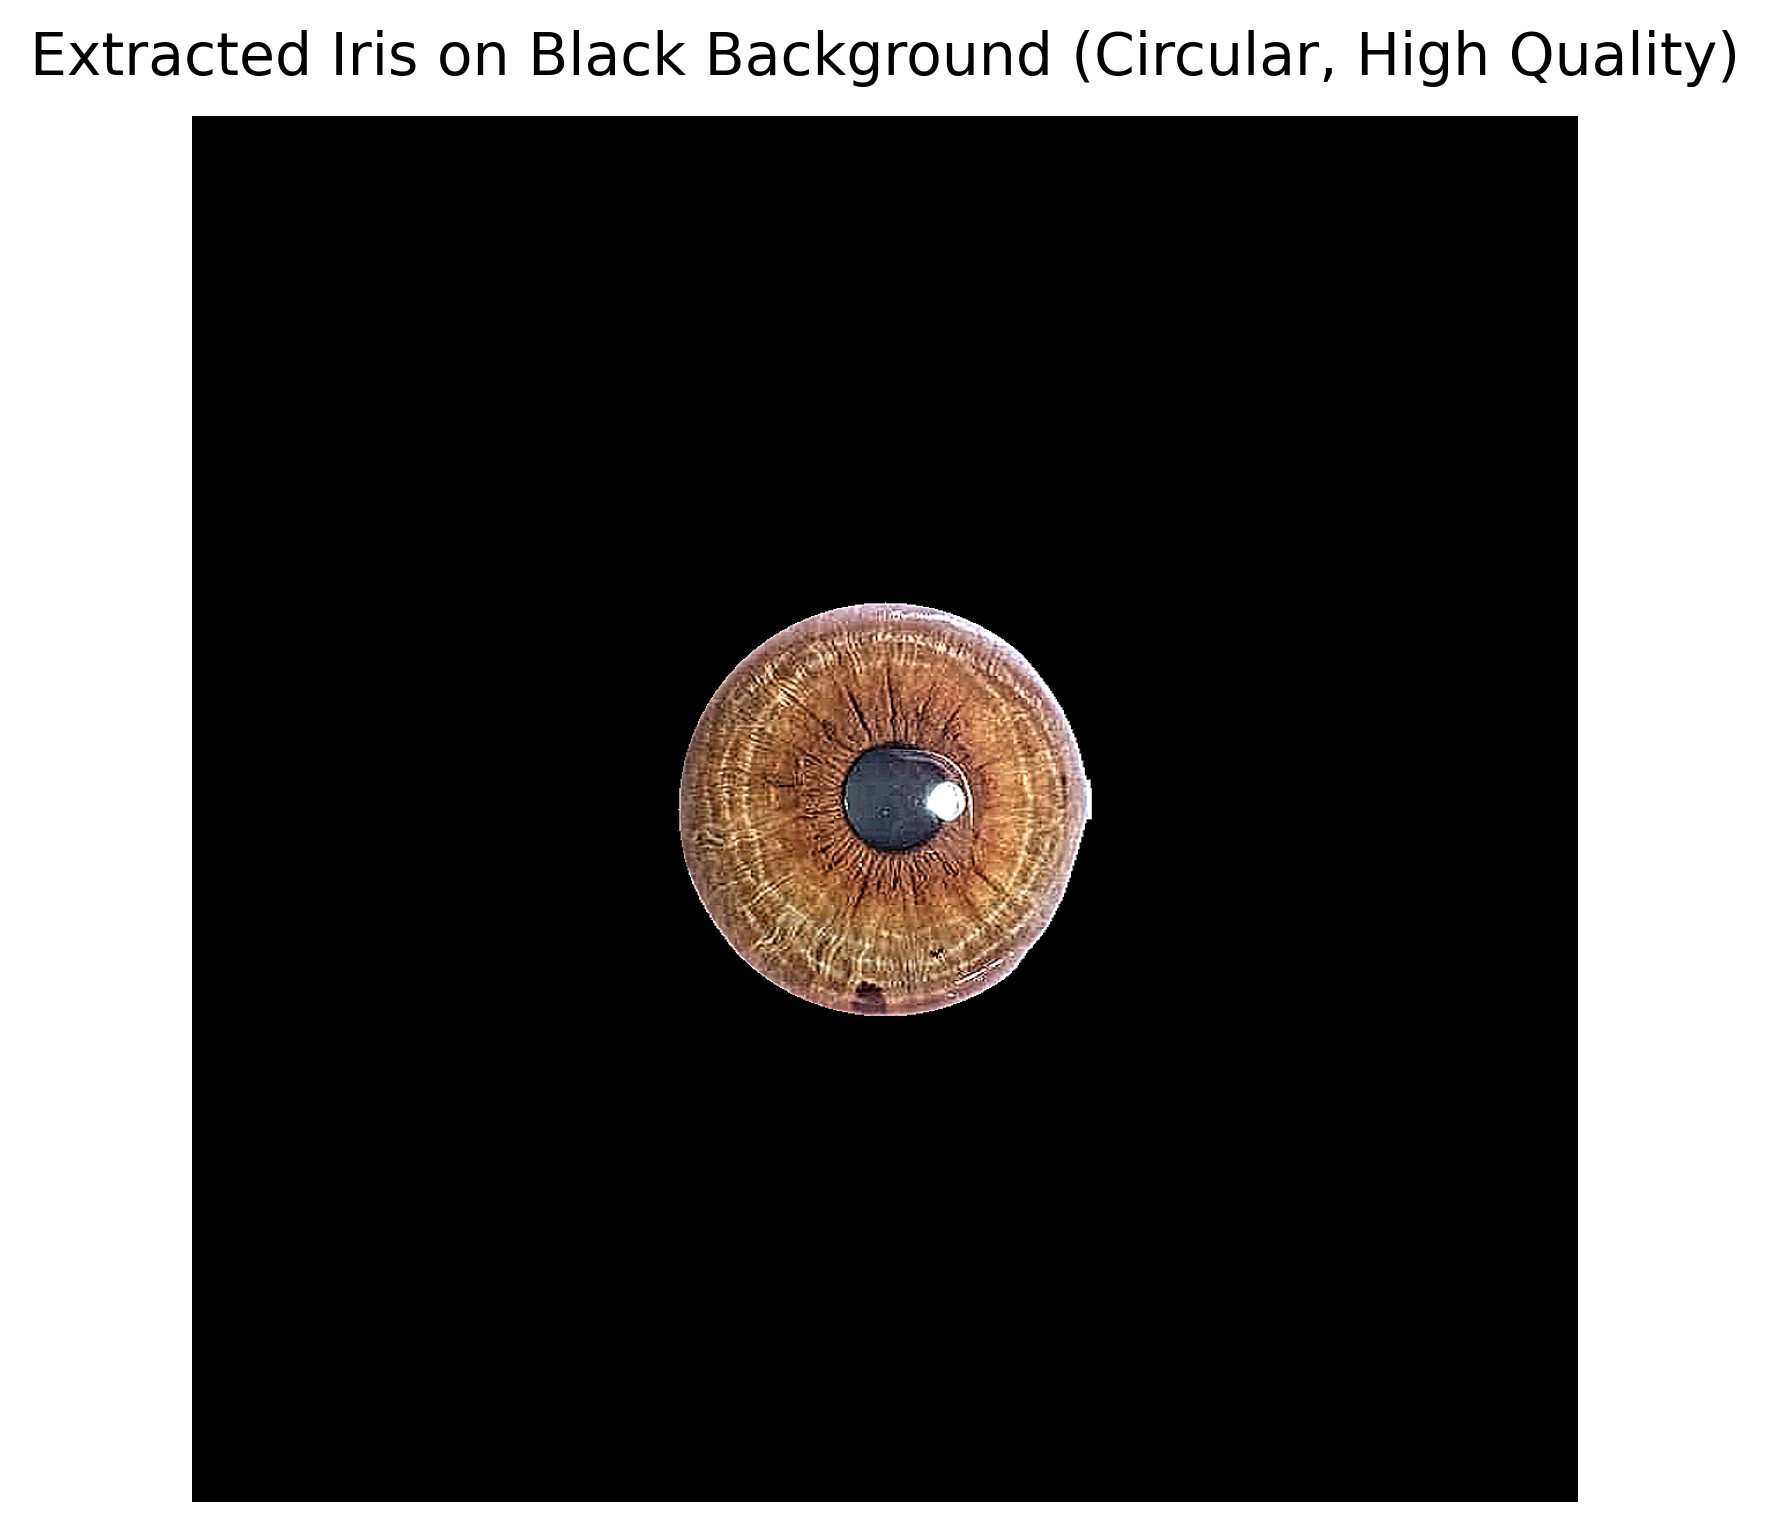

High-quality circular iris image saved to: new_folder/extracted_iris_on_black_20250308_010319.png
Prediction and visualization completed!


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from datetime import datetime

# Custom unsharp masking function to enhance image sharpness
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.5):
    """Apply unsharp masking to enhance image sharpness."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    return np.clip(sharpened, 0, 255).astype(np.uint8)

# 1. Load the trained YOLOv8-seg model
model = YOLO('/content/runs/train/iris_seg/weights/best.pt')

# 2. Define the path to the input eye image
image_path = '/content/iris-segmentation-2/test/images/10241-raw_jpeg_jpg.rf.6f67df8015d6601f6e2569eafea529ae.jpg'

# 3. Load the original image
orig_img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
orig_h, orig_w = orig_img.shape[:2]

if orig_img.dtype == np.uint16:
    orig_img = (orig_img / 256).astype(np.uint8)

# 4. Make predictions
target_size = (max(orig_h, orig_w) // 32 * 32, max(orig_h, orig_w) // 32 * 32)
results = model.predict(
    source=image_path,
    conf=0.25,  # Lowered threshold
    save=False,
    verbose=True,
    imgsz=target_size
)

# 5. Create a new output folder if it doesn’t exist
output_folder = 'new_folder'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 6. Process the results
for result in results:
    img = result.orig_img
    boxes = result.boxes
    classes = result.boxes.cls
    confidences = result.boxes.conf

    # Handle case where no masks are detected
    if result.masks is not None:
        masks = result.masks.data
        if torch.cuda.is_available():
            masks = masks.cpu()
        masks = masks.numpy()

        # Resize masks to match the original image dimensions with high-quality interpolation
        resized_masks = np.zeros((masks.shape[0], orig_h, orig_w), dtype=bool)
        for i, mask in enumerate(masks):
            resized_mask = cv2.resize(mask.astype(np.uint8), (orig_w, orig_h), interpolation=cv2.INTER_CUBIC)  # Use INTER_CUBIC for better quality
            resized_masks[i] = resized_mask > 0

        # Use the first mask (assuming one iris per image)
        iris_mask = resized_masks[0]  # Binary mask of the iris

        # Extract the iris region from the original image using the mask
        iris_region = orig_img.copy()
        iris_region[~iris_mask] = 0  # Set non-iris regions to black

        # Enhance the iris region for sharpness and clarity
        iris_region = cv2.detailEnhance(iris_region, sigma_s=10, sigma_r=0.15)  # Enhance details
        iris_region = unsharp_mask(iris_region, kernel_size=(5, 5), sigma=1.0, amount=1.5)  # Apply unsharp masking

        # Get the bounding box of the iris mask to crop it
        y, x = np.where(iris_mask)
        if len(y) > 0 and len(x) > 0:  # Ensure there are valid points
            y_min, y_max = np.min(y), np.max(y)
            x_min, x_max = np.min(x), np.max(x)

            # Crop the iris region
            cropped_iris = iris_region[y_min:y_max, x_min:x_max]

            # Determine the size of the iris to maintain its circular shape
            # Use the smaller dimension (height or width) to create a square for circular appearance
            iris_h, iris_w = cropped_iris.shape[:2]
            min_dim = min(iris_h, iris_w)  # Use the smaller dimension to avoid stretching
            target_size = int(min_dim * 1.5)  # Upscale by 50% for higher quality, maintaining circular shape

            # Resize the cropped iris to a square size with high-quality interpolation
            resized_iris = cv2.resize(cropped_iris, (target_size, target_size), interpolation=cv2.INTER_CUBIC)

            # Create a circular mask for the iris (to ensure a perfect circle)
            center = (target_size // 2, target_size // 2)
            radius = target_size // 2
            y, x = np.ogrid[:target_size, :target_size]
            dist_from_center = np.sqrt((x - center[0])**2 + (y - center[1])**2)
            circular_mask = dist_from_center <= radius

            # Apply the circular mask to the resized iris
            circular_iris = np.zeros((target_size, target_size, 3), dtype=np.uint8)
            circular_iris[circular_mask] = resized_iris[circular_mask]

            # Create a black rectangular background with higher resolution (e.g., 1200x1200 pixels for high quality)
            background_size = (1200, 1200, 3)  # Increased height and width for higher resolution
            black_background = np.zeros(background_size, dtype=np.uint8)

            # Calculate the center position to place the circular iris in the black background
            h, w = black_background.shape[:2]
            iris_h, iris_w = circular_iris.shape[:2]
            y_center = (h - iris_h) // 2
            x_center = (w - iris_w) // 2

            # Place the circular iris in the center of the black background
            black_background[y_center:y_center + iris_h, x_center:x_center + iris_w] = circular_iris

            # Apply additional sharpening to the final image for maximum clarity
            black_background = unsharp_mask(black_background, kernel_size=(5, 5), sigma=1.0, amount=1.5)

        # 7. Display the result with higher DPI and larger size for quality
        plt.figure(figsize=(6, 6), dpi=300)  # Larger figure size with high DPI for sharpness
        plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Extracted Iris on Black Background (Circular, High Quality)', pad=10, fontsize=14)
        plt.show()

        # 8. Save the result in the new output folder with a timestamp and maximum quality
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        output_filename = f'extracted_iris_on_black_{timestamp}.png'
        output_path = os.path.join(output_folder, output_filename)
        cv2.imwrite(output_path, black_background, [cv2.IMWRITE_PNG_COMPRESSION, 0])  # Save with no compression for maximum quality
        print(f"High-quality circular iris image saved to: {output_path}")

    else:
        print("No segmentation masks detected.")

print("Prediction and visualization completed!")


image 1/1 /content/download (27).jpg: 160x288 2 iriss, 7.4ms
Speed: 0.6ms preprocess, 7.4ms inference, 2.0ms postprocess per image at shape (1, 3, 160, 288)


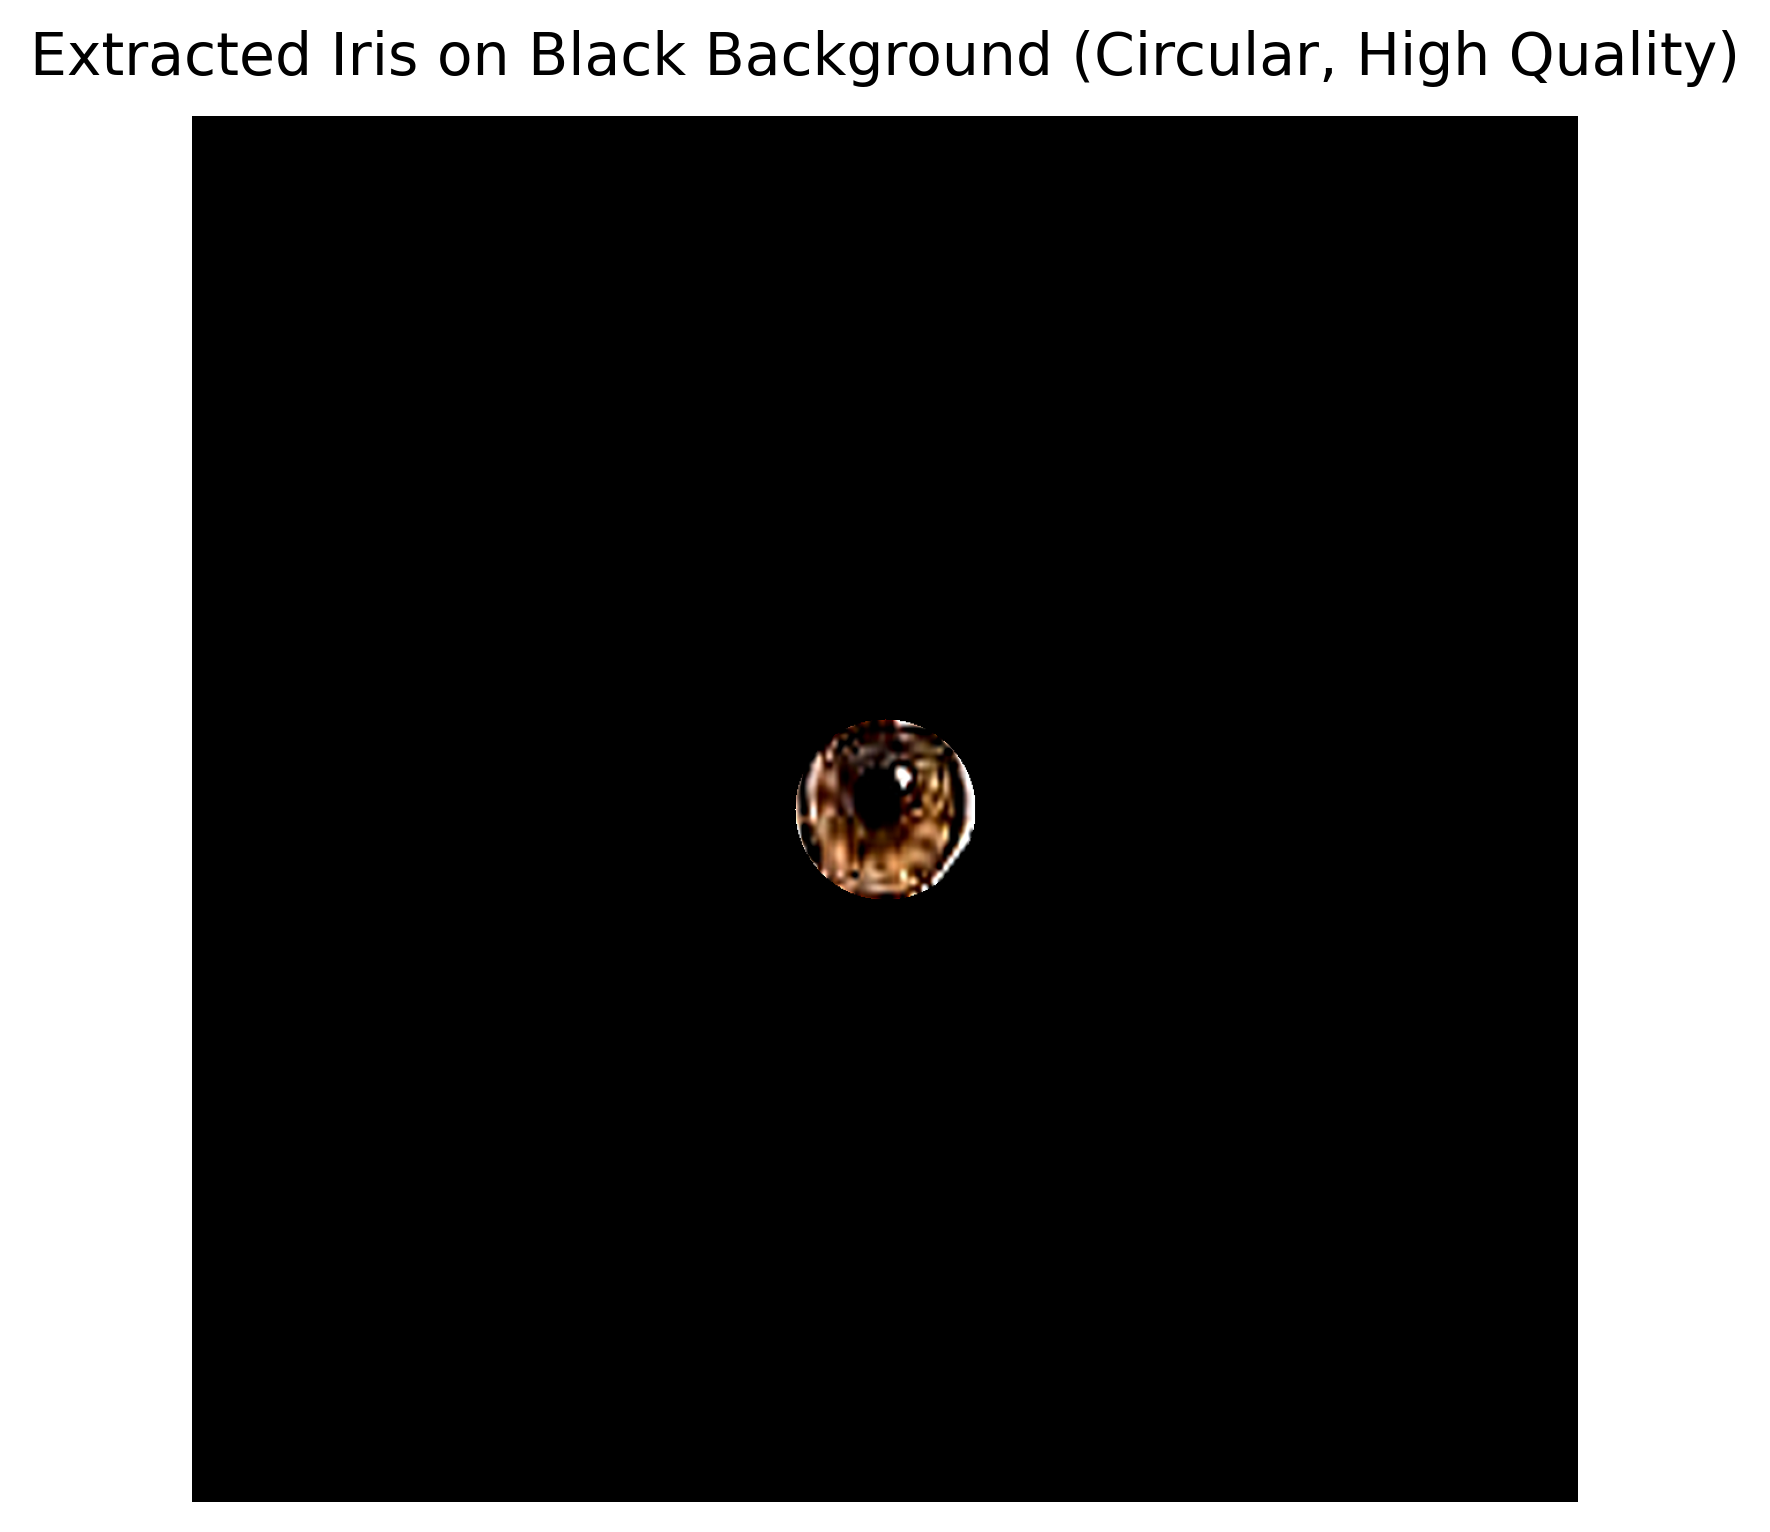

High-quality circular iris image saved to: new_folder/extracted_iris_on_black_20250308_010249.png
Prediction and visualization completed!


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from datetime import datetime

# Custom unsharp masking function to enhance image sharpness
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.5):
    """Apply unsharp masking to enhance image sharpness."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    return np.clip(sharpened, 0, 255).astype(np.uint8)

# 1. Load the trained YOLOv8-seg model
model = YOLO('/content/runs/train/iris_seg/weights/best.pt')

# 2. Define the path to the input eye image
image_path = '/content/download (27).jpg'

# 3. Load the original image
orig_img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
orig_h, orig_w = orig_img.shape[:2]

if orig_img.dtype == np.uint16:
    orig_img = (orig_img / 256).astype(np.uint8)

# 4. Make predictions
target_size = (max(orig_h, orig_w) // 32 * 32, max(orig_h, orig_w) // 32 * 32)
results = model.predict(
    source=image_path,
    conf=0.25,  # Lowered threshold
    save=False,
    verbose=True,
    imgsz=target_size
)

# 5. Create a new output folder if it doesn’t exist
output_folder = 'new_folder'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 6. Process the results
for result in results:
    img = result.orig_img
    boxes = result.boxes
    classes = result.boxes.cls
    confidences = result.boxes.conf

    # Handle case where no masks are detected
    if result.masks is not None:
        masks = result.masks.data
        if torch.cuda.is_available():
            masks = masks.cpu()
        masks = masks.numpy()

        # Resize masks to match the original image dimensions with high-quality interpolation
        resized_masks = np.zeros((masks.shape[0], orig_h, orig_w), dtype=bool)
        for i, mask in enumerate(masks):
            resized_mask = cv2.resize(mask.astype(np.uint8), (orig_w, orig_h), interpolation=cv2.INTER_CUBIC)
            resized_masks[i] = resized_mask > 0

        # Use the first mask (assuming one iris per image)
        iris_mask = resized_masks[0]  # Binary mask of the iris

        # Extract the iris region from the original image using the mask
        iris_region = orig_img.copy()
        iris_region[~iris_mask] = 0  # Set non-iris regions to black

        # Enhance the iris region for sharpness and clarity
        iris_region = cv2.detailEnhance(iris_region, sigma_s=10, sigma_r=0.15)
        iris_region = unsharp_mask(iris_region, kernel_size=(5, 5), sigma=1.0, amount=1.5)

        # Get the bounding box of the iris mask to crop it
        y, x = np.where(iris_mask)
        if len(y) > 0 and len(x) > 0:  # Ensure there are valid points
            y_min, y_max = np.min(y), np.max(y)
            x_min, x_max = np.min(x), np.max(x)

            # Crop the iris region
            cropped_iris = iris_region[y_min:y_max, x_min:x_max]

            # Determine the size of the iris to maintain its circular shape
            iris_h, iris_w = cropped_iris.shape[:2]
            min_dim = min(iris_h, iris_w)
            # === You can adjust the iris size here by changing the multiplier (was 1.5, now 2.0 for larger iris) ===
            target_size = int(min_dim * 6.0)  # Increased from 1.5 to 2.0 to make iris larger

            # Resize the cropped iris to a square size with high-quality interpolation
            resized_iris = cv2.resize(cropped_iris, (target_size, target_size), interpolation=cv2.INTER_CUBIC)

            # Create a circular mask for the iris
            center = (target_size // 2, target_size // 2)
            radius = target_size // 2
            y, x = np.ogrid[:target_size, :target_size]
            dist_from_center = np.sqrt((x - center[0])**2 + (y - center[1])**2)
            circular_mask = dist_from_center <= radius

            # Apply the circular mask to the resized iris
            circular_iris = np.zeros((target_size, target_size, 3), dtype=np.uint8)
            circular_iris[circular_mask] = resized_iris[circular_mask]

            # Create a black rectangular background
            background_size = (1200, 1200, 3)  # Background size remains the same
            black_background = np.zeros(background_size, dtype=np.uint8)

            # Calculate the center position to place the larger circular iris
            h, w = black_background.shape[:2]
            iris_h, iris_w = circular_iris.shape[:2]
            y_center = (h - iris_h) // 2
            x_center = (w - iris_w) // 2

            # Place the larger circular iris in the center of the black background
            black_background[y_center:y_center + iris_h, x_center:x_center + iris_w] = circular_iris

            # Apply additional sharpening to the final image
            black_background = unsharp_mask(black_background, kernel_size=(5, 5), sigma=1.0, amount=1.5)

        # 7. Display the result with higher DPI and larger size for quality
        plt.figure(figsize=(6, 6), dpi=300)
        plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Extracted Iris on Black Background (Circular, High Quality)', pad=10, fontsize=14)
        plt.show()

        # 8. Save the result with a timestamp
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        output_filename = f'extracted_iris_on_black_{timestamp}.png'
        output_path = os.path.join(output_folder, output_filename)
        cv2.imwrite(output_path, black_background, [cv2.IMWRITE_PNG_COMPRESSION, 0])
        print(f"High-quality circular iris image saved to: {output_path}")

    else:
        print("No segmentation masks detected.")

print("Prediction and visualization completed!")